In [1]:
!pip install pyasdf --user
!pip install pykooh --user
!pip install numpy==1.21
!pip install numba --user

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 9.2 MB/s eta 0:00:00:00:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.8/95.8 KB 1.9 MB/s eta 0:00:00ta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 421.5/421.5 KB 5.8 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 26.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 18.4 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 30.8 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 15.7 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 500.3/500.3 KB 6.4 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 KB 421.3 kB/s eta 0:00:0000:01
  Created wheel for pyasdf: filename=pyasdf-0.7.5-py3-none-any.whl size=12842

In [1]:
import os, os.path
import sys
import pandas as pd
import matplotlib.pyplot as plt
import pyasdf

In [6]:
# Read the flatfile
ff = pd.read_csv('/home/jupyter/NHERI-Published/PRJ-3031/notebooks/example_flatfile.csv')
eventid = set(ff.EarthquakeId) # get the earthquake ids

================ The example of processed ground motions (acceleration time series ====================)


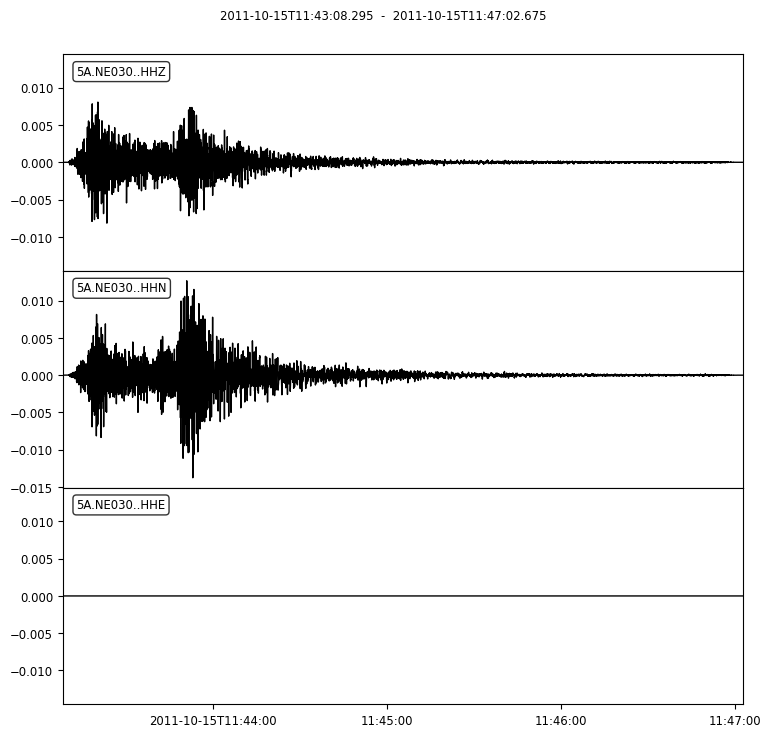

================ Get the time series for each component ===================================
5A.NE030..HHE | 2011-10-15T11:43:08.295000Z - 2011-10-15T11:47:02.675000Z | 100.0 Hz, 23439 samples


[ 3.34079577e-17  5.10019380e-17  6.15267585e-17 ... -9.63459608e-16
 -3.14634095e-16 -4.64065294e-17]

The sampling frequency is 100.0 Hz


         network: 5A
         station: NE030
        location: 
         channel: HHE
       starttime: 2011-10-15T11:43:08.295000Z
         endtime: 2011-10-15T11:47:02.675000Z
   sampling_rate: 100.0
           delta: 0.01
            npts: 23439
           calib: 1.0
         _format: ASDF
            asdf: AttribDict({'format_version': '1.0.3', 'event_ids': [ResourceIdentifier(id="nc71664296")], 'tag': 'nc71664296_processed2'})


In [7]:
for ID in eventid:
    # get the workspace for desired event
    # the dir to the corresponding workspace might be required to be modified
    ws = pyasdf.ASDFDataSet('/home/jupyter/NHERI-Published/PRJ-3031/data/{0}/workspace.h5'.format(ID), mode='r') # Load the workspace for the earthquake of interest
    # get the desired ground motions for one earthquake
    temp = ff[ff['EarthquakeId'] == ID]
    tag = '{}_processed2'.format(ID) # the LABEL of processed ground motions in this database (the first version) is processed2
    for stas in temp.StationID:
        sta = stas.rsplit('.', 1)[0] # get the network+stationcode to retrieve ground motions
        # get the processed ground motions
        st = ws.waveforms[sta][tag]
        print('================ The example of processed ground motions (acceleration time series ====================)')
        st.plot()
        
        print('================ Get the time series for each component ===================================')
        for i in range(len(st)):
            acc_trace = st[i] # get the ith component
            print(acc_trace)
            print('\n')
            # How to find the acceleration time series, sampling rate and other information
            # acceleration time series
            acc_time_series = acc_trace.data
            print(acc_time_series)
            # The fs of this component
            fs = acc_trace.stats.sampling_rate
            print('\nThe sampling frequency is {} Hz'.format(fs))
            # the overview of THIS component 
            stats = acc_trace.stats
            print('\n')
            print (stats)
            break
        break
    break
    

In [35]:
eventID = 'nc71664296'
ws = pyasdf.ASDFDataSet('/home/jupyter/NHERI-Published/PRJ-3031/data/{0}/workspace.h5'.format(eventID), mode='r')

In [38]:
raw_starttime = ws.waveforms['5A.NE030']['{}_unprocessed'.format(eventID)][0].stats['starttime']
# The P-wave arrival time picked by the record processing code is 2 seconds after 
# the start time of the waveform with tag: "{eventID}_processed2"
p_wave_starttime = ws.waveforms['5A.NE030']['{}_processed2'.format(eventID)][0].stats['starttime'] + 2

In [39]:
print(raw_starttime)
print(p_wave_starttime)

2011-10-15T11:40:59.875000Z
2011-10-15T11:43:06.295000Z
